In [55]:
import numpy as np
import pandas as pd

In [56]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics

In [57]:
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from IPython.display import Image 
import graphviz

In [58]:
df= pd.read_csv('C:/Users/rtfly/Documents/HDip/Web_DataMining/HR.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### After importing packages and data, first step is to convert the categorical variables to dummy variables

In [59]:
df = pd.get_dummies(df)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept_IT,dept_RandD,...,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.80,0.86,5,262,6,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.11,0.88,7,272,4,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.72,0.87,5,223,5,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.37,0.52,2,159,3,0,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### A copy is made for reusability in the next algorithm

In [60]:
df_rf = df.copy()

### A training:testing ratio of 80:20 is chosen for the Random Forest classifier

In [61]:
from sklearn.model_selection import train_test_split
target = df_rf.pop('left')
train_features, test_features, train_labels, test_labels = train_test_split(df_rf, target, test_size=0.2)

In [62]:
rf = RandomForestClassifier(n_estimators=500, max_depth = 5, random_state=0).fit(train_features, train_labels)

### Two test systems show the strength of its predictive ability. 9 in 10 is not bad!

In [63]:
rf_train_score = rf.score(train_features, train_labels)
print("Training score: ",rf_train_score)
rf_train_score = rf.score(test_features, test_labels)
print("Test score: ",rf_train_score)

Training score:  0.921160096675
Test score:  0.919333333333


In [64]:
x = test_features.head(10)    
y = test_labels.head(10)  
for i in range(10):
    pred = rf.predict([x.iloc[i]])
    pred = pred[0]
    print("Prediction: {} - Real value: {}".format(pred, y.iloc[i]))

Prediction: 0 - Real value: 0
Prediction: 1 - Real value: 1
Prediction: 1 - Real value: 1
Prediction: 1 - Real value: 1
Prediction: 0 - Real value: 0
Prediction: 0 - Real value: 0
Prediction: 1 - Real value: 1
Prediction: 0 - Real value: 1
Prediction: 1 - Real value: 1
Prediction: 1 - Real value: 1


### A confusion matrix can give better insight into just how well the model performed

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, rf.predict(test_features))
print(cm)

[[2261    7]
 [ 235  497]]


In [66]:
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

### Easier to visualise!

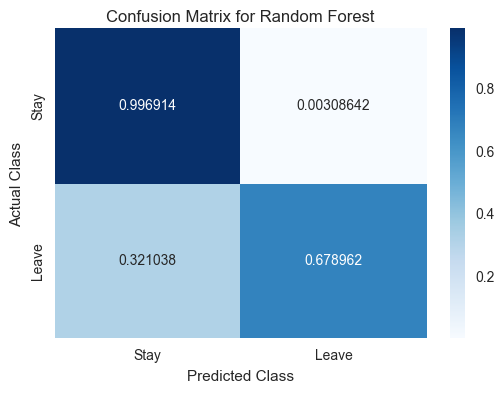

In [67]:
sns.heatmap(cm, annot=True,
            xticklabels = ["Stay", "Leave"],
            yticklabels = ["Stay", "Leave"],
            cmap='Blues', fmt='g').set(xlabel = "Predicted Class", 
                                       ylabel = "Actual Class", 
                                       title = 'Confusion Matrix for Random Forest')

### The same process is repeated to see if satisfaction level can be predicted using linear regression...

In [68]:
df_reg = df.copy()

In [69]:
target = df_reg.pop('satisfaction_level')
train_features, test_features, train_labels, test_labels = train_test_split(df_reg, target, test_size=0.2)

In [70]:
reg = linear_model.LinearRegression().fit(train_features, train_labels)

### ... it can not!

In [71]:
reg_score_train = reg.score(train_features, train_labels)
print("Training score: ",reg_score_train)
reg_score_test = reg.score(test_features, test_labels)
print("Testing score: ",reg_score_test)

Training score:  0.200557414206
Testing score:  0.191302170592


In [72]:
x = test_features.head(10)    
y = test_labels.head(10)  
for i in range(10):
    pred = reg.predict([x.iloc[i]])
    pred = pred[0]
    print("Prediction: {} - Real value: {}".format(pred, y.iloc[i]))

Prediction: 0.646601520384639 - Real value: 0.76
Prediction: 0.7192059270742813 - Real value: 0.49
Prediction: 0.7439269707018531 - Real value: 0.58
Prediction: 0.48383734268894985 - Real value: 0.89
Prediction: 0.6163854832322475 - Real value: 0.98
Prediction: 0.6962050389605284 - Real value: 0.61
Prediction: 0.6635124164362964 - Real value: 0.91
Prediction: 0.6860668149481279 - Real value: 0.53
Prediction: 0.7500428062258457 - Real value: 0.95
Prediction: 0.8022480739954039 - Real value: 0.21
